In [1]:
import sys; sys.path.append('..')
from hashstash.etc.performance import *
profiler = HashStashProfiler()

In [18]:
profile_kwargs = dict(
    # size=[1, 10, 100, 1_000, 10_000, 100_000, 1_000_000],
    size = [10_000],
    # num_proc = [1,2,3,4,5,6,7,8,9,10],
    num_proc=[8],
    iterations = 1000,
    compress=[True],
    b64=[True],
    profile_by=('engine',),
    # engine=['diskcache']
    # engine = ('memory', 'file', 'sqlite', 'redis', 'diskcache', 'shelve')
    # engine = ('shelve',)
    # engine = [x for x in ENGINES if x!='redis' and x!='shelve']
    engine=ENGINES,
)
profile_kwargs

{'size': [1000],
 'num_proc': [8],
 'iterations': 10000,
 'compress': [True],
 'b64': [True],
 'profile_by': ('engine',),
 'engine': ('memory',
  'file',
  'sqlite',
  'redis',
  'diskcache',
  'lmdb',
  'shelve')}

In [19]:
df = profiler.profile_df(**profile_kwargs)
df

{'engine': 'sqlite'}: 100%|██████████| 7/7 [01:20<00:00, 11.56s/it]


Time (s)  Rate (it/s)  Speed (MB/s)  \
Engine Encoding Operation write_num                                        
memory zlib+b64 Read      8516         0.0001   14716.8561       14.1053   
                          8153         0.0001   14768.6761       14.0986   
                          6539         0.0001   14716.8561       14.0912   
                          9204         0.0001   14716.8561       14.0632   
                          8653         0.0001   14716.8561       14.0632   
...                                       ...          ...           ...   
shelve zlib+b64 Write     2354         4.1390       0.2416        0.0002   
                          1483        11.4830       0.0871        0.0001   
                Read      5532         9.0871       0.1100        0.0001   
                Write     2471        18.3449       0.0545        0.0001   
                          3888        10.0501       0.0995        0.0001   

                                     Size (B)  Raw Size (B)  Cached Size (B)  \
Engine Encoding Operation write_num                                            
memory zlib+b64 Read      8516         1000.0        1005.0            852.0   
                          8153         1000.0        1001.0            844.0   
                          6539         1000.0        1004.0            860.0   
                          9204         1000.0        1002.0            856.0   
                          8653         1000.0        1002.0            852.0   
...                                       ...           ...              ...   
shelve zlib+b64 Write     2354         1000.0         999.0            844.0   
                          1483         1000.0        1001.0            852.0   
                Read      5532         1000.0        1004.0            852.0   
                Write     2471         1000.0         997.0            848.0   
                          3888         1000.0        1000.0            852.0   

                                     Compression Ratio (%)  Iteration  \
Engine Encoding Operation write_num                                     
memory zlib+b64 Read      8516                      0.0085     8785.0   
                          8153                      0.0084     1524.0   
                          6539                      0.0086     5969.0   
                          9204                      0.0085     3242.0   
                          8653                      0.0085     9171.0   
...                                                    ...        ...   
shelve zlib+b64 Write     2354                      0.0084     5117.0   
                          1483                      0.0085     9426.0   
                Read      5532                      0.0085     9709.0   
                Write     2471                      0.0085     5850.0   
                          3888                      0.0085     5495.0   

                                     Num Processes  Cumulative Time (s)  \
Engine Encoding Operation write_num                                       
memory zlib+b64 Read      8516                 8.0               0.6400   
                          8153                 8.0               0.6130   
                          6539                 8.0               0.4939   
                          9204                 8.0               0.6907   
                          8653                 8.0               0.6500   
...                                            ...                  ...   
shelve zlib+b64 Write     2354                 8.0              35.0277   
                          1483                 8.0              19.5701   
                Read      5532                 8.0              14.8099   
                Write     2471                 8.0              53.4198   
                          3888                 8.0              64.3556   

                                     Cumulative Size (MB)  
Engine Encoding Opera

In [21]:
df.groupby('Engine').mean(numeric_only=True).sort_values('Speed (MB/s)', ascending=False)

,Time (s),Rate (it/s),Speed (MB/s),Size (B),Raw Size (B),Cached Size (B),Compression Ratio (%),Iteration,Num Processes,Cumulative Time (s),Cumulative Size (MB)
Engine,,,,,,,,,,,
memory,0.000101,12454.249381,11.875671,1000.0,999.8635,848.3624,0.008485,4999.5,8.0,0.409956,4.768848
file,0.000206,6176.460771,5.889497,1000.0,999.8518,848.3196,0.008485,4999.5,8.0,1.076408,4.768848
lmdb,0.000273,5492.110903,5.237062,1000.0,999.8779,848.3052,0.008484,4999.5,8.0,1.555653,4.768848
shelve,0.005072,3197.202904,3.048858,1000.0,999.9233,848.2868,0.008484,4999.5,8.0,33.295424,4.768848
sqlite,0.006159,780.534470,0.744293,1000.0,999.8893,848.2524,0.008484,4999.5,8.0,30.613574,4.768848
redis,0.004225,313.050409,0.298503,1000.0,999.8344,848.2380,0.008483,4999.5,8.0,16.664773,4.768848
diskcache,0.007305,304.953145,0.290791,1000.0,999.8916,848.2540,0.008483,4999.5,8.0,37.450137,4.768848


In [22]:
def plot(
    profiler,
    x="write_total_size",
    y="write_total_time",
    shape=None,
    color="Engine",
    facet=None,
    group_by=["Engine", "write_num_bin", "Num Processes"],
    operations={'Read','Write'},
    size_by='Cumulative Size (MB)',
    **profile_kwargs
):
    p9.options.figure_size = 9, 6
    figdf=profiler.profile_df(group_by=group_by, operations=operations,**profile_kwargs).reset_index()
    figdf=figdf[figdf['write_num']>=10]
    
    # df = df.reset_index()
    # df['write_num_bin'] = df['write_num'] // 10 * 10
    # return figdf.sample(frac=1)
    fig = p9.ggplot(
        figdf,
        p9.aes(
            x=x,
            y=y,
            # shape=shape,
            color=color,
            size=size_by
        ),
    )
    # fig += p9.geom_line(alpha=0.5)
    fig += p9.geom_point(alpha=0.5)
    # fig += p9.geom_smooth()
    engine_order = figdf.groupby("Engine")[y].mean().sort_values(ascending=False).index
    figdf["Engine"] = pd.Categorical(figdf["Engine"], categories=engine_order)
    if facet:
        fig += p9.facet_wrap(facet, nrow=1)
    # fig += p9.facet_grid('Num Processes~Size (B)')
    # fig += p9.scale_x_log10()
    fig += p9.scale_y_log10()
    fig += p9.theme_classic()
    fig += p9.scale_size_continuous(range=(.1,3))
    return fig


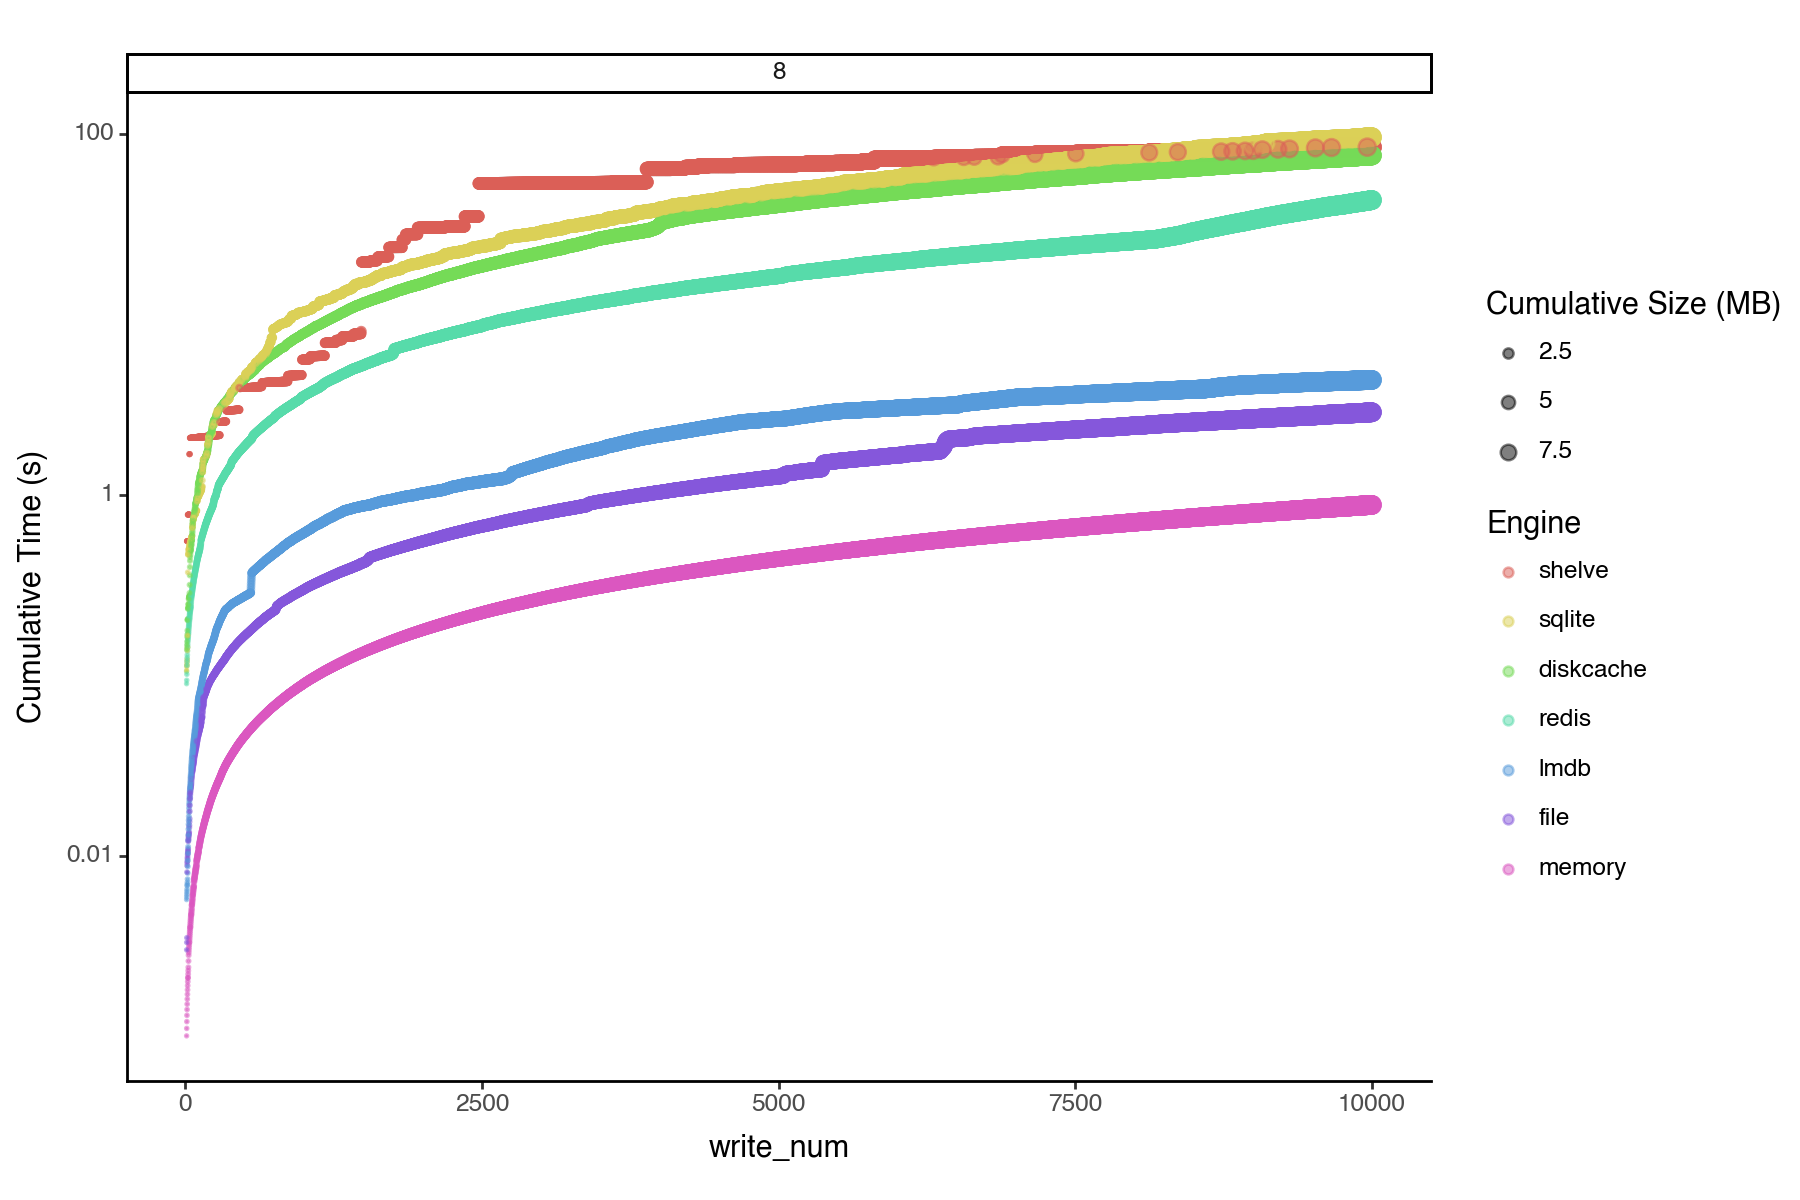

<Figure Size: (900 x 600)>

In [23]:
plot(profiler, 
    #  x='Cumulative Size (MB)', 
     x='write_num', 
     y='Cumulative Time (s)', 
     size_by='Cumulative Size (MB)', 
     group_by=["Engine", "write_num", "Num Processes"],
     color='Engine',
     facet='Num Processes',
     operations={'Write'},
     **profile_kwargs
)#.query('Engine=="memory"').sort_values('Speed (MB/s)')

In [7]:
# # !pip install -U pip wheel
# # !pip install scikit-misc
# # You can then use this method in your plotting function
# def plot_speed(self, y='Speed (MB/s)'):
#     import plotnine as p9
#     p9.options.figure_size = 9, 6
#     kwargs={**profile_kwargs, 'num_proc':10}
#     figdf = self.profile_df(group_by=['Engine', 'Encoding', 'Method', 'Num Processes', 'Speed Type'], by_speed=True, **kwargs).reset_index()
#     figdf = figdf.sort_values('Num Processes')
#     fig = p9.ggplot(figdf, p9.aes(x='Num Processes', y=y, size='Rate (it/s)',
#                                   color='Encoding'))
#     # fig += p9.geom_line(alpha=.5, size=2)
#     fig += p9.geom_point(alpha=.5)
#     fig += p9.geom_smooth()
#     engine_order = figdf.groupby('Engine')[y].mean().sort_values(ascending=False).index
#     figdf['Engine'] = pd.Categorical(figdf['Engine'], categories=engine_order)
#     # fig += p9.facet_wrap('Engine',nrow=1)
#     fig += p9.facet_grid('Speed Type~Engine', scales='free_y')
#     # fig += p9.scale_y_log10()
#     fig += p9.theme_classic()
#     return fig

# # profile_df_reshaped(profiler)
# # To use the new plot:
# plot_speed(profiler)

In [8]:
# # !pip install plotnine
# def plot_by_num_proc(self, y='Speed (MB/s)'):
#     import plotnine as p9
#     p9.options.figure_size=9,9
#     figdf = profile_reshaped(self)
#     figdf = figdf.groupby('Num Processes']).mean(numeric_only=True).reset_index()
#     return figdf
#     fig = p9.ggplot(figdf, p9.aes(x='Num Processes', y=y, color='Encoding', shape='Speed Type', label='Method'))
#     fig += p9.geom_line(alpha=.25, size=1)
#     fig += p9.geom_point(alpha=.25, size=5)

#     engine_order = figdf.groupby('Engine')[y].mean().sort_values(ascending=False).index
#     figdf['Engine'] = pd.Categorical(figdf['Engine'], categories=engine_order)
#     fig += p9.facet_wrap('Engine',nrow=1)
#     fig += p9.scale_x_log10()
#     fig += p9.scale_y_log10()
#     # fig += p9.geom_text(size=12)
#     fig += p9.theme_minimal()
#     return fig



# plot_by_num_proc(profiler)

In [9]:
# # !pip install plotnine
# import plotnine as p9
# p9.options.figure_size=9,9
# figdf = df.reset_index()
# fig = p9.ggplot(figdf, p9.aes(x='Read Speed (MB/s)', y='Write Speed (MB/s)', color='Engine', shape='Encoding', label='Method'))
# fig += p9.geom_point(alpha=.25, size=5)
# # fig += p9.scale_x_log10()
# # fig += p9.scale_y_log10()
# # fig += p9.geom_text(size=12)
# fig += p9.theme_minimal()
# fig

In [10]:
# # !pip install plotnine
# import plotnine as p9
# p9.options.figure_size=9,9
# figdf = df.reset_index()
# fig = p9.ggplot(figdf, p9.aes(x='Read Rate (it/s)', y='Write Rate (it/s)', color='Encoding', shape='Engine', label='Method'))
# fig += p9.geom_point(alpha=.25, size=5)
# fig += p9.scale_x_log10()
# fig += p9.scale_y_log10()
# # fig += p9.geom_text(size=12)
# fig += p9.theme_minimal()
# fig